<a href="https://colab.research.google.com/github/hechubo/DDM-Coursework/blob/master/Assignment1_20988466_HeChubo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. GET request**

In [ ]:
!pip install requests
import requests
import json

Use Route API to get information on route A28.

In [ ]:
url = "https://rt.data.gov.hk/v2/transport/citybus/route/CTB/A28"
response = requests.get(url)
route_data = response.json()

print("Route: ", route_data['data']['route'])
print("Origin (EN): ", route_data['data']['orig_en'])
print("Destination (EN): ", route_data['data']['dest_en'])

Route:  A28
Origin (EN):  LOHAS Park
Destination (EN):  Airport (via HZMB Hong Kong Port)


Get information about stations on route A28 in the inbound direction using Route-Stop API

In [ ]:
url = "https://rt.data.gov.hk/v2/transport/citybus/route-stop/CTB/A28/inbound"
response = requests.get(url)
route_stop_data = response.json()

stop_ids = [stop['stop'] for stop in route_stop_data['data']]
print("Stop IDs: ", stop_ids)

Stop IDs:  ['001837', '002672', '003304', '003482', '003540', '001854', '001766', '001523', '001688', '001696', '001697', '001653', '001652', '001780', '001788', '003498', '003499', '003500', '002701', '003068', '002705', '001677', '001678', '003234', '001823', '001763', '001764', '001824', '001825', '001826', '003160', '003225', '002919', '002928', '002929', '003329']


Combine the output of the Stop API and the Route-Stop API to get the names of the stops on the A28 route.

In [ ]:
stop_names = {}
for stop_id in stop_ids:
    url = f"https://rt.data.gov.hk/v2/transport/citybus/stop/{stop_id}"
    response = requests.get(url)
    stop_data = response.json()
    stop_names[stop_id] = stop_data['data']['name_tc']

print("Stop Names: ")
for stop_id, name in stop_names.items():
    print(f"{stop_id}: {name}")

Stop Names: 
001837: 機場 (地面運輸中心)
002672: 機場博覽館, 航展道
003304: 香港天際萬豪酒店, 航天城東路
003482: 航天城交匯處, 航天城東路
003540: 港珠澳大橋香港口岸
001854: 青嶼幹線巴士轉乘站
001766: 畢架山花園, 龍翔道
001523: 黃大仙站, 龍翔道
001688: 沙田坳道, 龍翔道
001696: 鑽石山站, 大磡道
001697: 牛池灣村, 龍翔道
001653: 牛池灣街市, 清水灣道
001652: 彩雲邨白虹樓, 新清水灣道
001780: 基順學校, 新清水灣道
001788: 順利消防局, 利安道
003498: 安泰邨, 安秀道
003499: 安達邨愛達樓, 安秀道
003500: 安達邨, 安秀道
002701: 寶達邨, 寶琳路
003068: 寶達邨
002705: 馬游塘村, 寶琳路
001677: 康盛花園, 寶琳北路
001678: 翠林邨, 寶琳北路
003234: 富麗花園, 寶康路
001823: 唐明街公園, 唐明街
001763: 彩明苑彩富閣, 景嶺路
001764: 調景嶺站, 景嶺路
001824: 將軍澳中心, 寶邑路
001825: 將軍澳站, 寶邑路
001826: 將軍澳廣場, 寶邑路
003160: 蓬萊路, 環保大道
003225: 百勝角, 環保大道
002919: 峻瀅, 環保大道
002928: 日出康城領都, 環保大道
002929: 日出康城首都, 環保大道
003329: 日出康城


找出"將軍澳站, 寶邑路"站点在A28路线inbound方向上的stop_id:

In [ ]:
target_stop_name = "將軍澳站, 寶邑路"
target_stop_id = None
for stop_id, name in stop_names.items():
    if name == target_stop_name:
        target_stop_id = stop_id
        break

print(f"Stop ID for {target_stop_name}: {target_stop_id}")

Stop ID for 將軍澳站, 寶邑路: 001825


使用ETA API获取A28路线inbound方向"將軍澳站, 寶邑路"站点的下一班车到达时间估计

In [49]:
import datetime
import pytz
API_eta = f'https://rt.data.gov.hk/v2/transport/citybus/eta/CTB/001825/A28'
response_eta = requests.get(API_eta)
data_eta = response_eta.json()['data']
data_eta_dict = data_eta[0]
#print(data_eta_dict)
eta = data_eta_dict.get('eta')
print('ETA of A28 at 將軍澳站, 寶邑路(Inbound):',eta)

current_time = datetime.datetime.now(pytz.timezone('Asia/Hong_Kong'))
eta_time = datetime.datetime.strptime(eta, "%Y-%m-%dT%H:%M:%S%z").astimezone(pytz.timezone('Asia/Hong_Kong'))

# 计算时间差
time_difference = eta_time - current_time

# 打印时间差
print("时间差: ", time_difference)


ETA of A28 at 將軍澳站, 寶邑路(Inbound): 2024-03-17T12:40:51+08:00
时间差:  0:08:22.969780


**2.POST request**

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.5/257.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00


In [ ]:
from openai import AzureOpenAI
import requests


api_endpoint = "https://hkust.azure-api.net/openai/deployments/gpt-35-turbo/chat/completions?api-version=2023-05-15"
api_key = "67218ae20d7543e58dab422217916604"

headers = {
    "Content-Type": "application/json",
    "api-key": api_key
}

data = {
    "messages": [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Please write a poem to wish me luck in my job search."}
    ],
    "max_tokens": 300,
    "temperature": 0.7
}

response = requests.post(api_endpoint, headers=headers, json=data)

if response.status_code == 200:
    result = response.json()
    print(result["choices"][0]["message"]["content"])
else:
    print("请求失败:", response.status_code, response.text)

May your job search be filled with light,
And opportunities that feel just right.
May every resume and cover letter you send,
Lead to interviews and chances to extend.

May your confidence shine through,
And your skills and experience speak true.
May you find a job that brings you joy,
And a workplace where you'll truly enjoy.

May your determination and hard work pay off,
And may you find a job that makes you feel boss.
May you be surrounded by colleagues who inspire,
And may your career be filled with success that never tires.

So go forth with a positive attitude and a hopeful heart,
And let the universe do its part.
We wish you all the luck and all the best,
In finding a job that will bring you true happiness and rest.


**3. Web Scraping**

Youngest Champion Age: 23.0
Oldest Champion Age: 46.0
Mean Age of Champions: 31.6081081081081


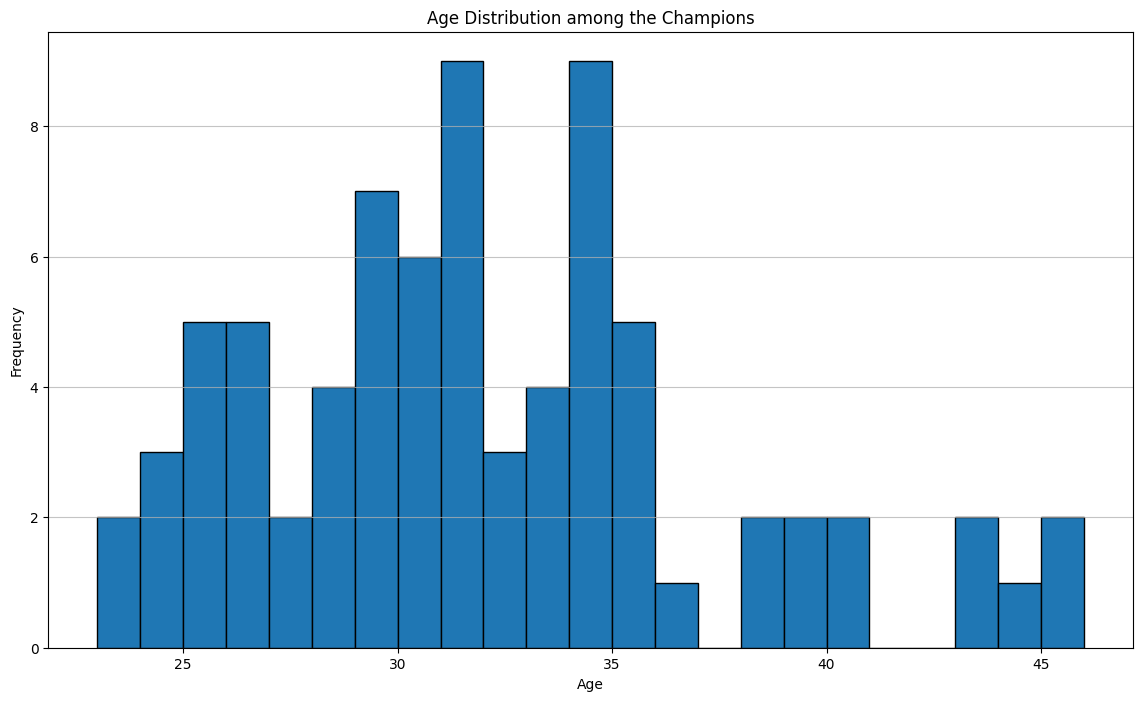

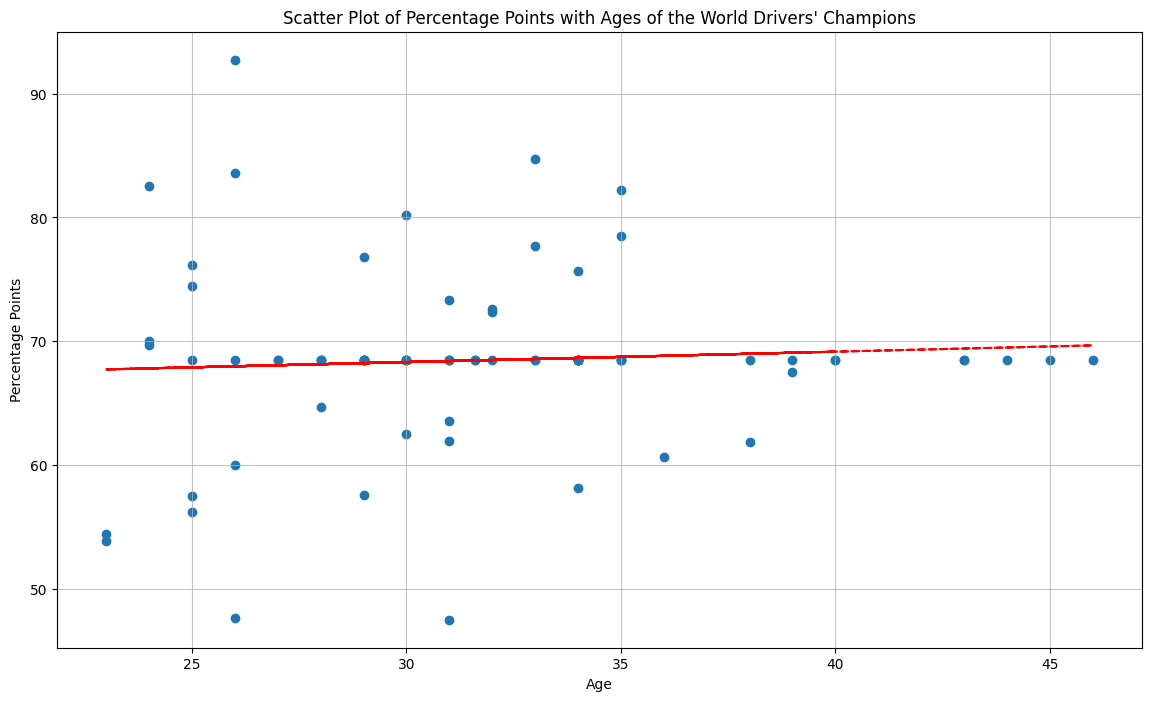

In [54]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = 'https://en.wikipedia.org/wiki/List_of_Formula_One_World_Drivers%27_Champions'
response = requests.get(url)
html_content = response.text

soup = BeautifulSoup(html_content, 'html.parser')
tables = soup.find_all('table', {'class': 'wikitable'})

for table in tables:
    try:
        caption = table.find('caption').get_text(strip=True)
        if "World Drivers' Champions by season" in caption:
            target_table = table
            break
    except AttributeError:
        continue

df = pd.read_html(str(target_table))[0]
df = df.iloc[1:]
df.columns = df.columns.droplevel(0)

df[['Season', 'Age', '% Points']] = df[['Season', 'Age', '% Points']].apply(pd.to_numeric, errors='coerce')
df[['Age', '% Points']] = df[['Age', '% Points']].fillna(df[['Age', '% Points']].mean())

youngest_age = df['Age'].min()
oldest_age = df['Age'].max()
mean_age = df['Age'].mean()
age_range = oldest_age - youngest_age

print("Youngest Champion Age:", youngest_age)
print("Oldest Champion Age:", oldest_age)
print("Mean Age of Champions:", mean_age)

plt.figure(figsize=(14, 8))
plt.hist(df['Age'], bins=int(age_range), edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution among the Champions')
plt.grid(axis='y', alpha=0.75)
plt.show()


plt.figure(figsize=(14, 8))
plt.scatter(df['Age'], df['% Points'])
plt.xlabel('Age')
plt.ylabel('Percentage Points')
plt.title("Scatter Plot of Percentage Points with Ages of the World Drivers' Champions")

z = np.polyfit(df['Age'], df['% Points'], 1)
p = np.poly1d(z)
plt.plot(df['Age'], p(df['Age']), "r--")

plt.grid(axis='both', alpha=0.75)
plt.show()

In [56]:
print(df2)

    Season  Percentage Points
0     1950             83.333
1     1951             86.111
2     1952            100.000
3     1953             95.833
4     1954             93.333
5     1955             88.889
6     1956             66.667
7     1957             88.889
8     1958             77.778
9     1959             68.889
10    1960             89.583
11    1961             75.556
12    1962             93.333
13    1963            100.000
14    1964             74.074
15    1965            100.000
16    1966             93.333
17    1967             62.963
18    1968             53.333
19    1969             77.778
20    1970             45.455
21    1971             76.543
22    1972             67.778
23    1973             60.684
24    1974             47.009
25    1975             59.722
26    1976             54.762
27    1977             53.333
28    1978             50.794
29    1979             70.833
30    1980             74.444
31    1981             50.505
32    1982

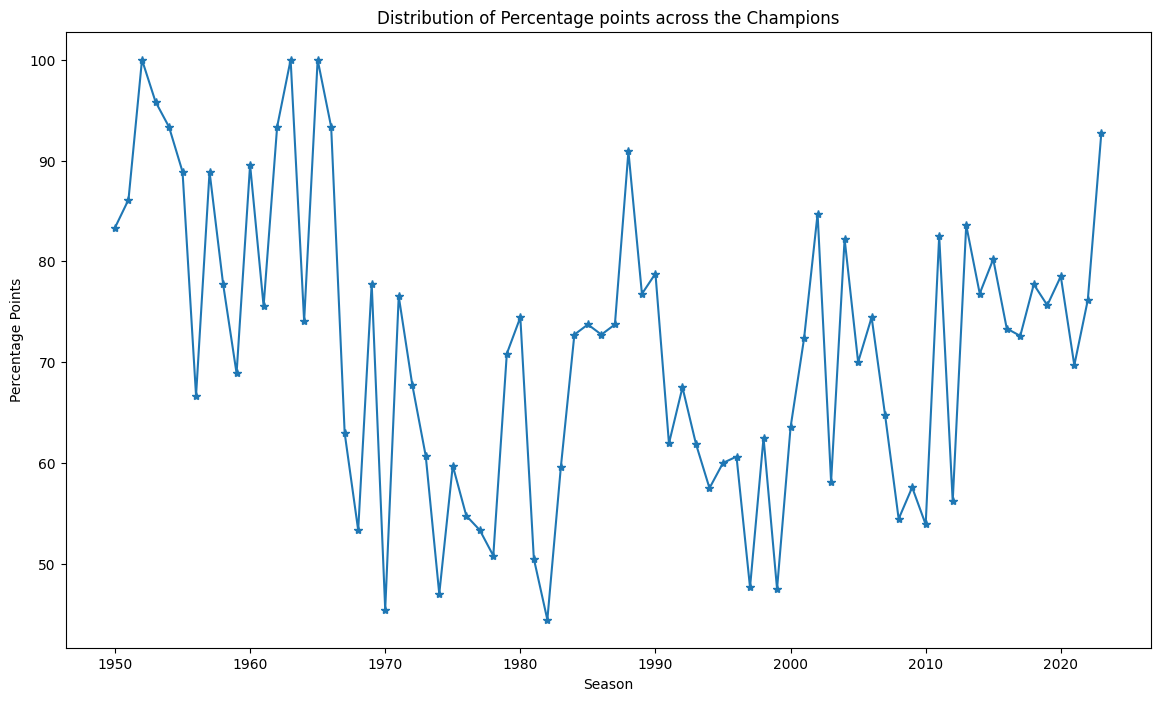

In [55]:
df2['Season'] = pd.to_numeric(df2['Season'], errors='coerce')
df2['Percentage Points'] = pd.to_numeric(df2['Percentage Points'], errors='coerce')

plt.figure(figsize=(14, 8))
plt.plot(df2['Season'], df2['Percentage Points'],'-*')
plt.xlabel('Season')
plt.ylabel('Percentage Points')
plt.title('Distribution of Percentage points across the Champions')
plt.show()